# **在訓練資料上已經有好的結果了，接下來看看驗證資料的結果...**

## **匯入所需的函式庫**

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

## **準備資料**

In [2]:
pkgo = pd.read_csv('./Data/pkgo_nyc_class5.csv')

In [3]:
X_ = pkgo.iloc[:, :-1]
X = X_.values  # 將 dataframe 轉換成 ndarray 的資料型態
X_.head(10)

,latitude,longitude,local.month,local.day,local.hour,local.minute,local.second,appearedTimeOfDay,appearedHour,appearedMinute,...,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,0.004751,-0.617821,9,8,2,51,33,4,4,51,...,0,0,0,0,0,0,0,0,0,0
1,0.073257,-0.703223,9,8,2,50,45,4,4,50,...,0,0,0,0,0,0,0,0,0,0
2,0.001167,-0.612492,9,8,2,37,31,4,4,37,...,0,0,0,0,0,0,0,0,0,0
3,0.208499,-0.532359,9,8,2,34,37,4,4,34,...,0,0,0,0,0,0,0,0,0,0
4,-0.297792,-0.640407,9,8,2,34,6,4,4,34,...,0,0,0,0,0,0,0,0,0,0
5,-0.297866,-0.640410,9,8,2,28,17,4,4,28,...,0,0,0,0,0,0,0,0,0,0
6,-0.297744,-0.640399,9,8,2,23,7,4,4,23,...,0,0,0,0,0,0,0,0,0,0
7,-0.297871,-0.640412,9,8,2,21,1,4,4,21,...,0,0,0,0,0,0,0,0,0,0
8,0.208481,-0.532345,9,8,2,20,13,4,4,20,...,0,0,0,0,0,0,0,0,0,0
9,-0.297743,-0.640400,9,8,2,17,38,4,4,17,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 做 One-hot encoding
y = pkgo['class']
y = to_categorical(y)

## **建構模型**

In [5]:
def build_model(X):
    model = keras.Sequential()

    model.add(layers.Dense(128, input_dim=X.shape[1]))
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(256))
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(5))
    model.add(layers.Activation('softmax'))

    return model

In [6]:
model = build_model(X)

# 編譯模型用以訓練 (設定 optimizer, loss function, metrics, 等等)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['acc'])

In [7]:
# 設定訓練參數
batch_size = 16
epochs = 50

In [8]:
# 訓練模型
model_history \
    = model.fit(X, y,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                shuffle=True,
                validation_split=0.1)

Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 1s 531us/sample - loss: 1.5206 - acc: 0.4921 - val_loss: 1.5936 - val_acc: 0.5489
Epoch 2/50
1652/1652 [==============================] - 0s 118us/sample - loss: 1.2271 - acc: 0.5496 - val_loss: 1.4127 - val_acc: 0.6304
Epoch 3/50
1652/1652 [==============================] - 0s 117us/sample - loss: 1.0574 - acc: 0.6126 - val_loss: 1.2946 - val_acc: 0.5978
Epoch 4/50
1652/1652 [==============================] - 0s 118us/sample - loss: 1.0437 - acc: 0.6162 - val_loss: 1.3801 - val_acc: 0.5000
Epoch 5/50
1652/1652 [==============================] - 0s 119us/sample - loss: 0.9890 - acc: 0.6283 - val_loss: 1.1311 - val_acc: 0.6576
Epoch 6/50
1652/1652 [==============================] - 0s 117us/sample - loss: 0.9268 - acc: 0.6604 - val_loss: 1.1898 - val_acc: 0.6304
Epoch 7/50
1652/1652 [==============================] - 0s 117us/sample - loss: 0.8772 - acc: 0.6834 - val_loss: 1.2051 - val

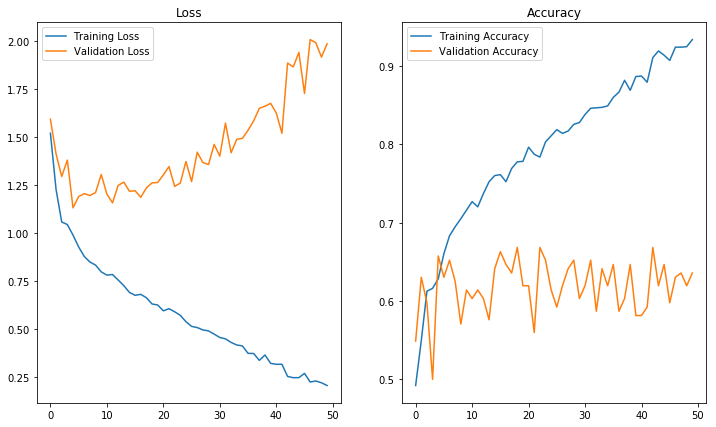

In [9]:
# 視覺化訓練過程
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

plt.figure(figsize=(12, 7))

# 繪製 Training loss 和 Validation loss
plt.subplot(121)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Loss')

# 繪製 Training accuracy 和 Validation accuracy
plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Accuracy')

plt.show()

![title](./Slides_image/overfitting.png)

![title](./Slides_image/overfitting_factor.png)

# **調整模型 — 驗證結果不佳時**

![title](./Slides_image/Bad_result_on_test.png)

## **減少過擬合的方法 (降低模型複雜度)**

* ## [**Regularization**](#訓練技巧-—-Regularization)
* ## [**Early Stopping**](#訓練技巧-—-Early-Stopping)
* ## [**Dropout**](#訓練技巧-—-Dropout)

* ## **訓練技巧 — Regularization**

![title](./Slides_image/regularization_1.png)

![title](./Slides_image/regularization_2.png)

![title](./Slides_image/regularization_3.png)

In [10]:
from tensorflow.keras.regularizers import l1_l2

In [11]:
def build_model_regular(X, l1_alpha, l2_alpha):  # 重新建構一個可以新增 Regularizers 的模型
    model = keras.Sequential()

    # 在 hidden layer 加入 regularizers
    model.add(layers.Dense(128, input_dim=X.shape[-1],
                           kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(layers.Activation('relu'))

    # 在 hidden layer 加入 regularizers
    model.add(layers.Dense(256,
                           kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(layers.Activation('relu'))

    # 在 hidden layer 加入 regularizers
    model.add(layers.Dense(5,
                           kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(layers.Activation('softmax'))
    return model

In [12]:
# 以下放置要比較的 regularizer 數值
l1_l2_list = [(0, 0), (5e-4, 0), (0, 5e-4), (5e-4, 5e-4)]

batch_size = 16
epochs = 50

# 建立兩個 list 記錄選用不同 regularizer 數值的訓練結果
train_loss_list = []
train_acc_list = []

# 建立兩個 list 記錄選用不同 regularizer 數值的驗證結果
valid_loss_list = []
valid_acc_list = []

# 迭代不同的 regularizer 數值去訓練模型
for l1_alpha, l2_alpha in l1_l2_list:
    print('Building a model with regularizer L1: {}, L2: {}'
          .format(l1_alpha, l2_alpha))

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model_regular(X, l1_alpha, l2_alpha)
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=1e-3),
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        validation_split=0.1)

    # 將訓練過程記錄下來
    train_loss_list.append(history.history['loss'])
    valid_loss_list.append(history.history['val_loss'])
    train_acc_list.append(history.history['acc'])
    valid_acc_list.append(history.history['val_acc'])
print('----------------- training done! -----------------')

Building a model with regularizer L1: 0, L2: 0
Building a model with regularizer L1: 0.0005, L2: 0
Building a model with regularizer L1: 0, L2: 0.0005
Building a model with regularizer L1: 0.0005, L2: 0.0005
----------------- training done! -----------------


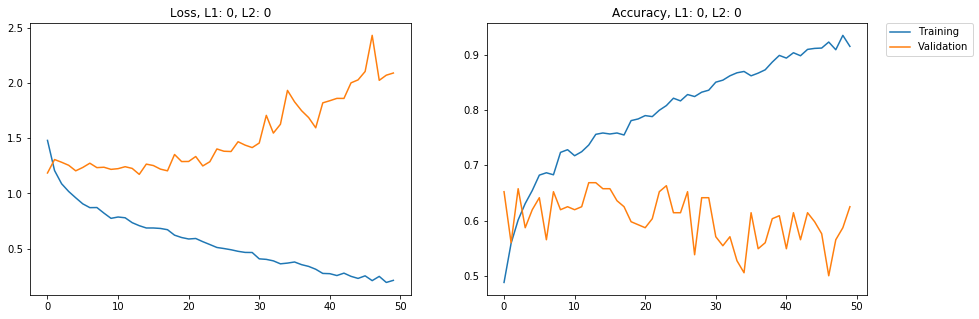

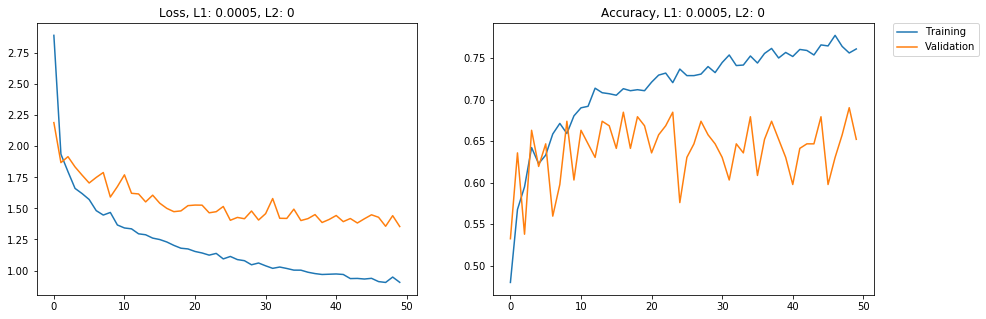

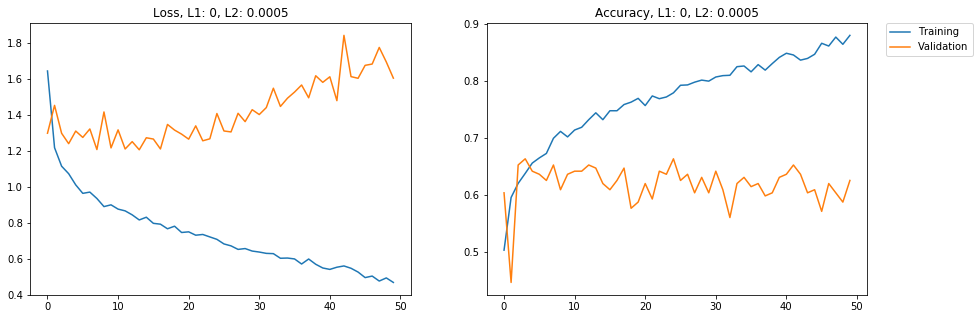

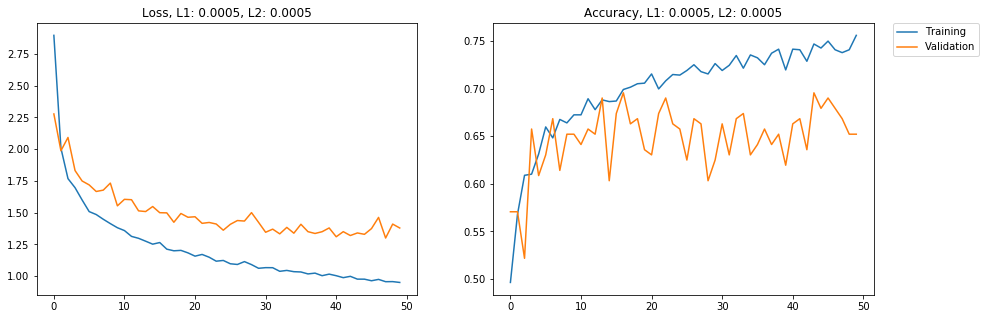

In [13]:
# 視覺化訓練結果
for k in range(len(l1_l2_list)):
    plt.figure(0, figsize=(15, 5))

    # 繪製 Training loss 和 Validation loss
    plt.subplot(121)
    l1, l2 = l1_l2_list[k]
    loss = train_loss_list[k]
    val_loss = valid_loss_list[k]
    plt.plot(range(len(loss)), loss, label='Training')
    plt.plot(range(len(val_loss)), val_loss, label='Validation')
    title = 'Loss, L1: {}, L2: {}'.format(l1, l2)
    plt.title(title)

    # 繪製 Training accuracy 和 Validation accuracy
    plt.subplot(122)
    l1, l2 = l1_l2_list[k]
    acc = train_acc_list[k]
    val_acc = valid_acc_list[k]
    plt.plot(range(len(acc)), acc, label='Training')
    plt.plot(range(len(val_acc)), val_acc, label='Validation')
    title = 'Accuracy, L1: {}, L2: {}'.format(l1, l2)
    plt.title(title)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

    plt.show()

[(Back to Training Tips)](#減少過擬合的方法-(降低模型複雜度))

* ## **訓練技巧 — Early Stopping**

![title](./Slides_image/early_stopping.png)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
n_patience = 5  # 訓練過程經過 n_patience 次沒有進步之後停止
early_stopping = EarlyStopping(monitor='val_loss',   # 是否進步的指標
                               patience=n_patience,
                               verbose=1)

In [16]:
model = build_model(X)

# 編譯模型用以訓練 (設定 optimizer, loss function, metrics, 等等)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=['acc'])

In [17]:
# 設定訓練參數
batch_size = 16
epochs = 50

In [18]:
# 訓練模型
history = \
    model.fit(X, y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              shuffle=True,
              validation_split=0.1,
              callbacks=[early_stopping])  # 將 early_stopping 放在 callbacks

Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 1s 419us/sample - loss: 1.4560 - acc: 0.4976 - val_loss: 1.2760 - val_acc: 0.5870
Epoch 2/50
1652/1652 [==============================] - 0s 119us/sample - loss: 1.1616 - acc: 0.5872 - val_loss: 1.1688 - val_acc: 0.6196
Epoch 3/50
1652/1652 [==============================] - 0s 122us/sample - loss: 1.0717 - acc: 0.6102 - val_loss: 1.2102 - val_acc: 0.6250
Epoch 4/50
1652/1652 [==============================] - 0s 118us/sample - loss: 0.9845 - acc: 0.6525 - val_loss: 1.3856 - val_acc: 0.5000
Epoch 5/50
1652/1652 [==============================] - 0s 118us/sample - loss: 0.9840 - acc: 0.6477 - val_loss: 1.3085 - val_acc: 0.5870
Epoch 6/50
1652/1652 [==============================] - 0s 117us/sample - loss: 0.9100 - acc: 0.6743 - val_loss: 1.1911 - val_acc: 0.6522
Epoch 7/50
1652/1652 [==============================] - 0s 117us/sample - loss: 0.8903 - acc: 0.6919 - val_loss: 1.2304 - val

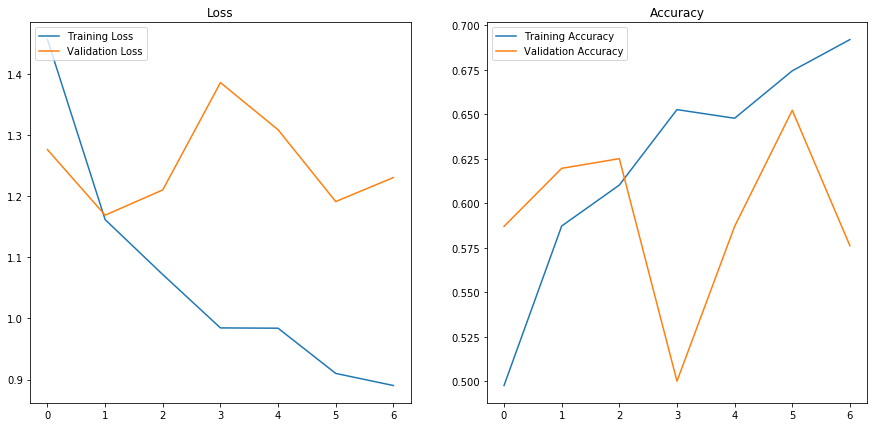

In [19]:
# 視覺化訓練過程
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(15, 7))

# 繪製 Training loss 和 Validation loss
plt.subplot(121)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Loss')

# 繪製 Training accuracy 和 Validation accuracy
plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()

[(Back to Training Tips)](#減少過擬合的方法-(降低模型複雜度))

* ## **訓練技巧 — Dropout**

![title](./Slides_image/dropout.png)

In [20]:
def build_model_drop(X, drp_rate):  # 重新建構一個可以新增 Dropout 的模型
    model = keras.Sequential()

    model.add(layers.Dense(512, input_dim=X.shape[-1]))
    model.add(layers.Activation('relu'))

    # 加入 Dropout
    model.add(layers.Dropout(drp_rate))

    model.add(layers.Dense(512))
    model.add(layers.Activation('relu'))

    # 加入 Dropout
    model.add(layers.Dropout(drp_rate))

    model.add(layers.Dense(5))
    model.add(layers.Activation('softmax'))
    return model

In [21]:
# 以下放置要比較的 dropout rate
dropout_rates = [0, 0.1, 0.2, 0.4, 0.6, 0.8]

batch_size = 16
epochs = 50

# 建立兩個 list 記錄選用不同 dropout rate 的訓練結果
train_loss_list = []
train_acc_list = []

# 建立兩個 list 記錄選用不同 dropout rate 的驗證結果
valid_loss_list = []
valid_acc_list = []

# 迭代不同的 dropout rate 去訓練模型
for drp_rate in dropout_rates:
    print('Training a model with dropout rate: {}'.format(drp_rate))

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model_drop(X, drp_rate)
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(lr=1e-3),
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        validation_split=0.1)

    # 將訓練結果記錄下來
    train_loss_list.append(history.history['loss'])
    train_acc_list.append(history.history['acc'])
    valid_loss_list.append(history.history['val_loss'])
    valid_acc_list.append(history.history['val_acc'])
print('----------------- training done! -----------------')

Training a model with dropout rate: 0
Training a model with dropout rate: 0.1
Training a model with dropout rate: 0.2
Training a model with dropout rate: 0.4
Training a model with dropout rate: 0.6
Training a model with dropout rate: 0.8
----------------- training done! -----------------


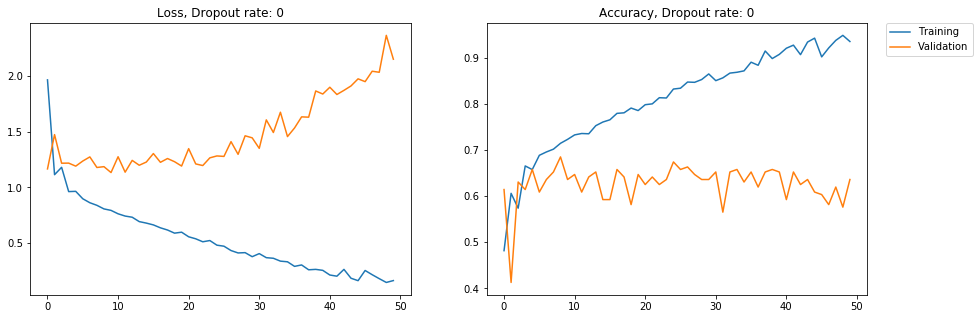

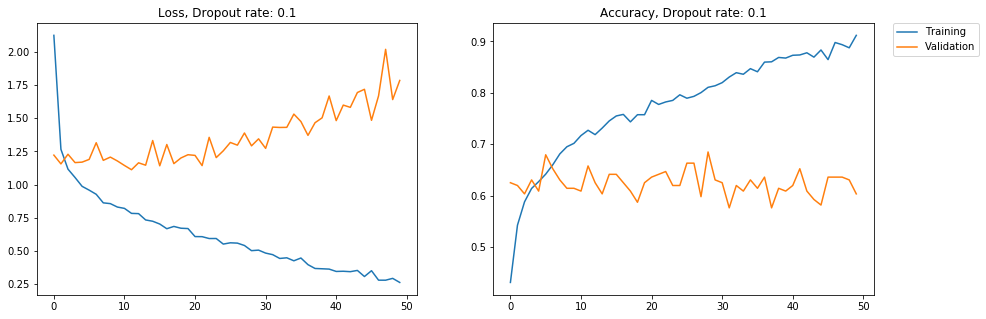

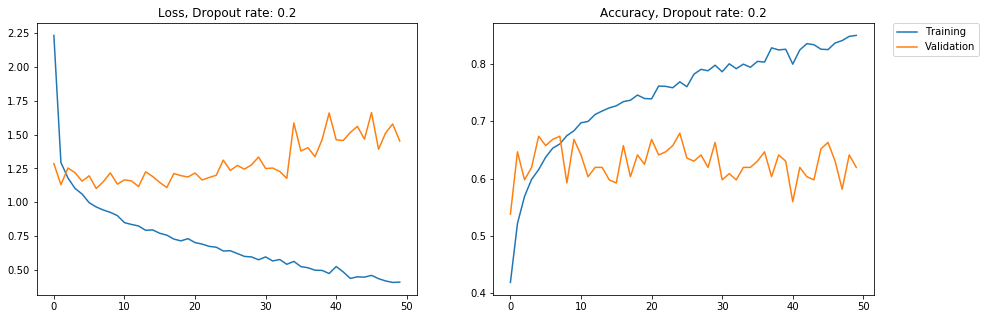

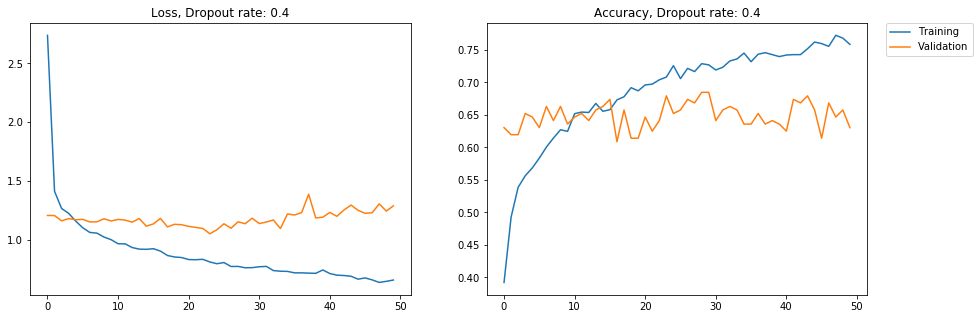

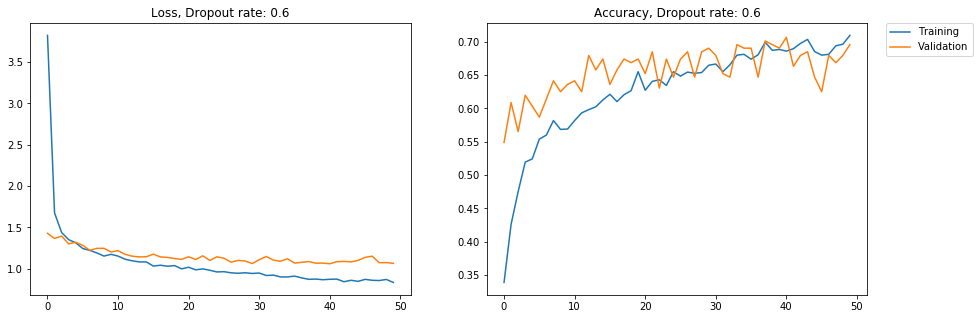

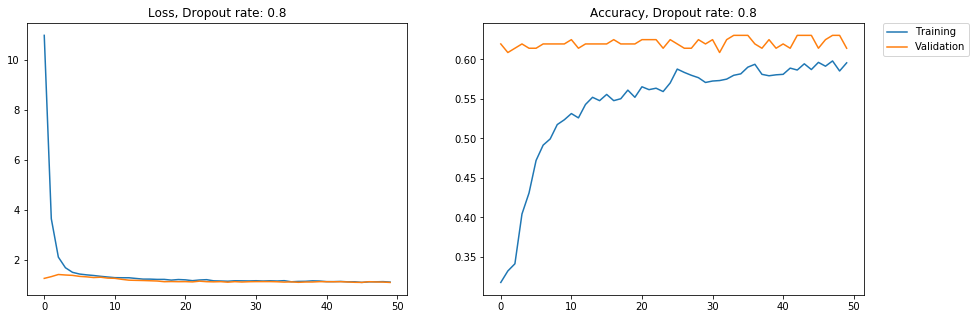

In [22]:
# 視覺化訓練過程
for k in range(len(dropout_rates)):
    plt.figure(0, figsize=(15, 5))

    drp_rate = dropout_rates[k]

    # 繪製 Training loss 和 Validation loss
    plt.subplot(121)
    loss = train_loss_list[k]
    val_loss = valid_loss_list[k]
    plt.plot(range(len(loss)), loss, label='Training')
    plt.plot(range(len(val_loss)), val_loss, label='Validation')
    title = 'Loss, Dropout rate: {}'.format(drp_rate)
    plt.title(title)

    # 繪製 Training accuracy 和 Validation accuracy
    plt.subplot(122)
    acc = train_acc_list[k]
    val_acc = valid_acc_list[k]
    plt.plot(range(len(acc)), acc, label='Training')
    plt.plot(range(len(val_acc)), val_acc, label='Validation')
    title = 'Accuracy, Dropout rate: {}'.format(drp_rate)
    plt.title(title)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

    plt.show()

[(Back to Training Tips)](#減少過擬合的方法-(降低模型複雜度))